# Comparison of Numerical to Analytical Solution of the Acoustic Wave Equation

This interactive file walks through the process of forming a numerical simulation of the acoustic wave equation from scratch. It also subsequently compares the numerical simulations with the expectation given by the analytical solution. Note that there are three main sections: 

1. Setup: This section introduces the variables, functions, etc... 

2. Simulation 1: The first simulation simulates a propagating acoustic wave as a result of a source that is the first derivative of a Gaussian. 

3. Simulation 2: This simulation is similar to the previous one. However, in this simulation, the amplitude of the wave is recorded at a single position and we see how the (pressure) amplitude changes as a result of the wave passing by that position. This is compared to how the (pressure) amplitude would change when a Gaussian would pass by.

The simulation sometimes can run quite slow. In the case where you don't want to wait for the simulation finish you can interrupt the kernel and continue to the next code block. If the code is behaving differently than it should, please restart the kernel and run everything again.

## Setup: Importing libraries and files

These are imports of files made by me and libraries. The functionality of the files made by me is explained in-depth in the report and the libraries speak for themselves. Furthermore, there is a command on the last line that blocks warnings from being printed on the screen and the command on the sixth line makes matplotlib print interactive figures.

In [1]:
from functions import *
from pressure import *
import numpy as np
import warnings
import matplotlib
matplotlib.use("nbagg")
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

## Setup: Initializing parameters

The parameters are initialized in the below block of code. A short description of each of the parameters is given in comments to the right of the definitions. Note that these parameters can be changed for different results.

In [2]:
xsize = 10000                                 # Size of x axis (m)
xSteps   = 10000                              # Number of x axis grid points
dx   = xsize/(xSteps-1)                       # Size of discrete position step
WaveSpeed   = 334.                            # Speed of wave (m/s)
SourcePos = int(xSteps/2)                     # location of source on the x axis
SourceReceiverPos   = SourcePos + 100         # Location of receiver in grid. This variables function will be evident later.
TimeSteps   = 1001                            # Number of time steps in simulation
dt   = 0.0010                                 # Size of discrete time unit
xpos    = np.arange(xSteps)                   # Position on x axis. This variable's function will be evident later
xpos    = xpos*dx
c    = np.zeros(xSteps)                       # Speed of wave in an array. This variable's function will be evident later.
c    = c + WaveSpeed      

SourceFreq   = 25.                            # Main frequency of source
Shift   = 4. / SourceFreq                     # Shift of the source time

## Setup: Generating the source function (derivative of Gaussian)

The class "gaussianderivative" is defined in the file "functions.py" that is imported in the beginning. In the first of these two lines, an instance representing the source function is constructed. In the second line, the source function is returned into the variable "SourceFunc". The variable "Time" is the discrete time spectrum on which the source function is projected and the variable "Shift" represents the time shift of the source function.

In [3]:
Source = gaussianderivative(SourceFreq, TimeSteps, dt) # Initializes source parameters
SourceFunc,Time,Shift = Source.returnfunction() # Returns the discrete source function, its time axis, and respective shift

## Setup: Plotting the source function over time

This section visualizes the source function over a time x-axis and amplitude y-axis. It is also a test to make sure that the correct source function was generated.

<IPython.core.display.Javascript object>


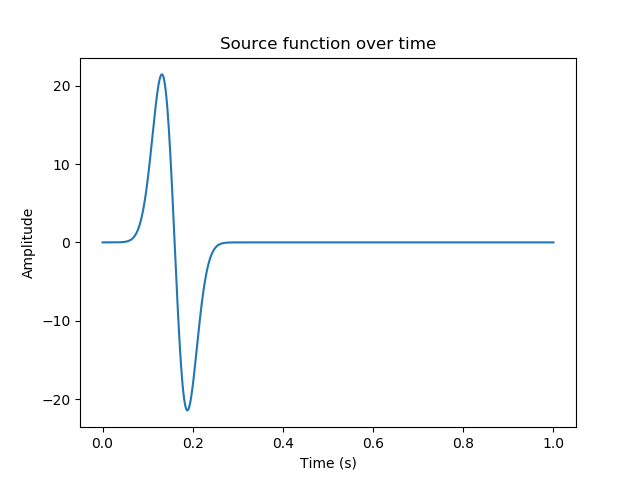

In [4]:
plt.figure(0) # Plotting the source function over time
plt.plot(Time,SourceFunc)
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.title("Source function over time")
plt.show()

## Setup: Printing the source function over a frequency spectrum

The first line calculates a fast fourier transform of the source function to extract its constituent frequencies. In the second line the time spectrum is translated to a frequency domain. After this, frequency is plotted on the x-axis and amplitude is again plotted on the y-axis. Again, this is used as a test to make sure that the correct source function was generated.

<IPython.core.display.Javascript object>


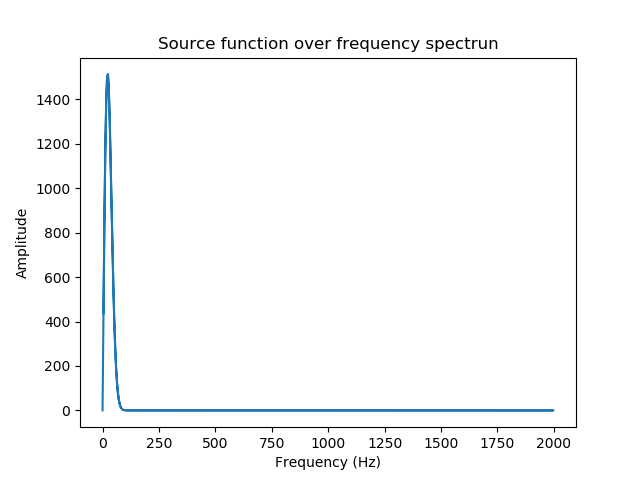

In [5]:
FreqSpectrum = np.fft.fft(SourceFunc) # Fast Fourier transform to go to frequency domain
TimeSpectrum = np.fft.fftfreq(FreqSpectrum.size, d = dt / 4.) # Translation of time domain to frequency domain

plt.figure(1) # Plotting the source function's frequency spectrum
plt.plot(np.abs(TimeSpectrum), np.abs(FreqSpectrum))
plt.ylabel("Amplitude")
plt.xlabel("Frequency (Hz)")
plt.title("Source function over frequency spectrun")
plt.show()

## Setup: Generating the analytical solution (Gaussian)

The class "gaussian" is defined in the file "functions" that is imported in the beginning. In the first of these two lines, an instance representing the analytical solution is initiated. In the second line, the analytical solution is returned into the variable "AnalyticFunc". The variable "lim" is used to put limits on the y-axis in a plot later on.

In [6]:
Analytic = gaussian(SourceFreq,TimeSteps,dt,SourceFunc,SourceReceiverPos,SourcePos,WaveSpeed,dx,xpos)
AnalyticFunc, lim = Analytic.returnfunction()

## Simulation 1: Initializing pressure instance

The class "pressure" can be found in a file called "pressure.py" that is imported in the second line in the first code block. In the line of code presented below, an instance of pressure is made called "DynamicPressure" which contains all the pressure related variables that change during the simulation and some methods that apply to these variables.

In [7]:
DynamicPressure = pressure(xSteps,dx,dt,c)

## Simulation 1: Plotting empty space

A figure is plotted that will be used for the simulation. The amplitude of the pressure wave is plotted on the y-axis with position on the x-axis. Since there is currently no pressure wave present the blue line that represents the pressure lays still horizontally. The red dot represents the location where the source will be initiated in the simulation. If our prediction is correct, the wave formed by the blue line will keep the same shape and travel in both directions at some constant speed.

<IPython.core.display.Javascript object>


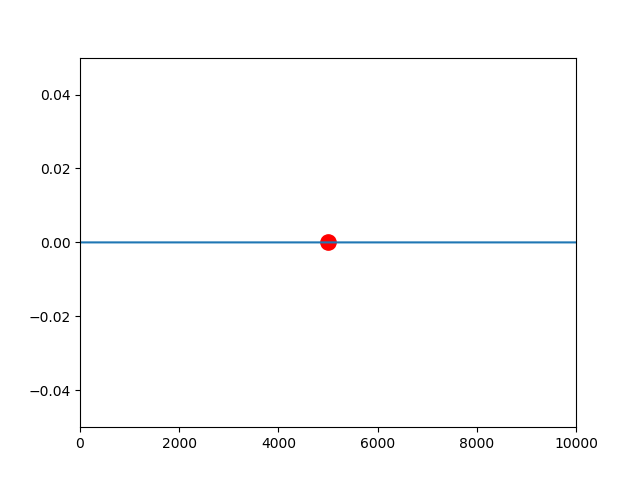

In [12]:
plt.figure(2)
plt.ion()


SourcePosPlot,= plt.plot(SourcePos, 0, 'ro', markersize=11) 
PressurePlot,= plt.plot(DynamicPressure.Pressure) 
plt.xlim(0, xsize)
plt.ylim(-np.max(DynamicPressure.Pressure), np.max(DynamicPressure.Pressure))


plt.show()

## Simulation 1: Running the simulation

The below block of code actually runs the simulation. It is a loop over all the timesteps. Within this outer loop, there is first a loop over all the grid locations. On each of these grid positions, the finite element approach is used to calculate the second derivative of the pressure. The result of this is stored in the array: "DynamicPressure.PressureSecDer". After this, time extrapolation of pressure is calculated which gives  "DynamicPressure.PressureNew". At index location "SourcePos", the "DynamicPressure.PressureNew" variable is calculated seperately. This is what creates the pressure as a result of the source. The old pressure is then replaced for the current pressure and the current pressure is replaced with the new pressure to remap the time levels. The last if statetement updates the plot once every 5 timesteps. When the below code block is ran, the plot generated above will be updated accordingly every 5 timesteps.

In [9]:
for TimeStep in range(TimeSteps):


    for i in range(1, xSteps - 1):
        DynamicPressure.PressureSecDer[i] = (DynamicPressure.Pressure[i + 1] - 2 * DynamicPressure.Pressure[i] + DynamicPressure.Pressure[i - 1]) / (dx ** 2)



    DynamicPressure.PressureNew = 2 * DynamicPressure.Pressure - DynamicPressure.PressureOld + (c ** 2) * (dt ** 2) * DynamicPressure.PressureSecDer

    DynamicPressure.PressureNew[SourcePos] = DynamicPressure.PressureNew[SourcePos] + SourceFunc[TimeStep] / (dx) * (dt ** 2)
    
            

    DynamicPressure.PressureOld, DynamicPressure.Pressure = DynamicPressure.Pressure, DynamicPressure.PressureNew
    
    
    DisplayFreq = 5
    if (TimeStep % DisplayFreq) == 0:
        plt.title('TimeStep = %d' % TimeStep)
        plt.ylim(-1.1*np.max(abs(DynamicPressure.Pressure)), 1.1*np.max(abs(DynamicPressure.Pressure)))

        xshift=20;window=50
        plt.xlim(SourcePos*dx+WaveSpeed*TimeStep*dt-window*dx-xshift, SourcePos*dx+WaveSpeed*TimeStep*dt+window*dx-xshift)
        PressurePlot.set_ydata(DynamicPressure.Pressure)
        plt.gcf().canvas.draw()

## Simulation 2: Initializing pressure instance

A new instance of the "pressure" class is created.

In [10]:
DynamicPressure = pressure(xSteps,dx,dt,c)

## Simulation 2:  Plotting analytical solution on a seismogram

The following code block plots the analytical solution as a dotted line. The pressure, again the blue line, is plotted behind it as well. Note that the pressure has zero amplitude at all times since the simulation has not been ran yet. The vertical green line that is currently at (0,0) follows the pressure at the measured location from times t=0 to t=1. If our prediction was correct, and the wave is indeed the integral of the source function, and thus a Gaussian, the green line will trace the red dotted line.

<IPython.core.display.Javascript object>


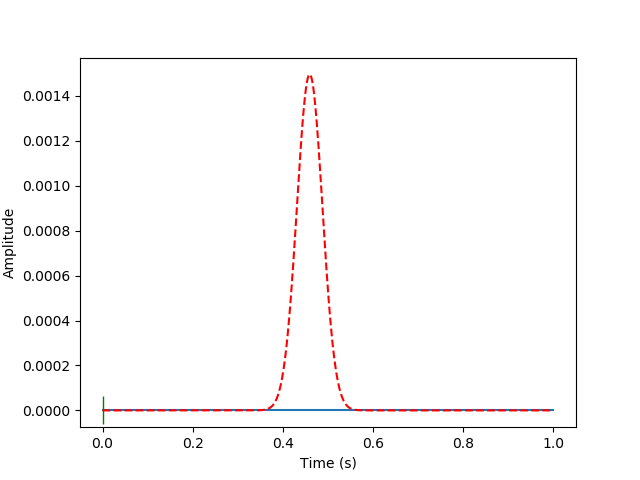

In [11]:
plt.figure(3)

Seismogram = np.zeros(TimeSteps)


SeismogramPlot,= plt.plot(Time, Seismogram)
TimePos,= plt.plot([0], [0], 'g|', markersize=20)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.plot(Time,AnalyticFunc,'r--')
plt.show()

## Simulation 2: Running the simulation

The procedure of actually running the simulation is similar to simulation 1. What is different here is that we actually only care about the behavior of the wave at one point in space, namely that of the receiver. Therefore, right before the if statement, we have one line that updates the seismogram on every timestep with the pressure amplitude of the wave at the position where we want to measure it, "SourceReceiverPos". In the if statement, the plot gets updated one in five timesteps with the new seismogram.

In [12]:
for TimeStep in range(TimeSteps):

    for i in range(1, xSteps - 1):
        DynamicPressure.PressureSecDer[i] = (DynamicPressure.Pressure[i + 1] - 2 * DynamicPressure.Pressure[i] + DynamicPressure.Pressure[i - 1]) / (dx ** 2)


    DynamicPressure.PressureNew = 2 * DynamicPressure.Pressure - DynamicPressure.PressureOld + (c ** 2) * (dt ** 2) * DynamicPressure.PressureSecDer

    DynamicPressure.PressureNew[SourcePos] = DynamicPressure.PressureNew[SourcePos] + SourceFunc[TimeStep] / (dx) * ((dt) ** 2)
    

    DynamicPressure.PressureOld, DynamicPressure.Pressure = DynamicPressure.Pressure, DynamicPressure.PressureNew
    
    
    Seismogram[TimeStep] = DynamicPressure.Pressure[SourceReceiverPos]
    

    DisplayFreq = 5
    if (TimeStep % DisplayFreq) == 0:
        plt.title('TimeStep = %d' % TimeStep)
        plt.ylim(-1.1*np.max(abs(DynamicPressure.Pressure)), 1.1*np.max(abs(DynamicPressure.Pressure)))
        xshift=20;window=50
        SeismogramPlot.set_ydata(Seismogram)
        TimePos.set_data(Time[TimeStep], Seismogram[TimeStep])
        plt.gcf().canvas.draw()